<a href="https://colab.research.google.com/github/SachinScaler/UnsupervisedML_Feb24/blob/main/Anomaly_Detection_2_EllipticEnvelope%2C_IsolationForest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 37.5MB/s]


import and read data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)


df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [39]:
df.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


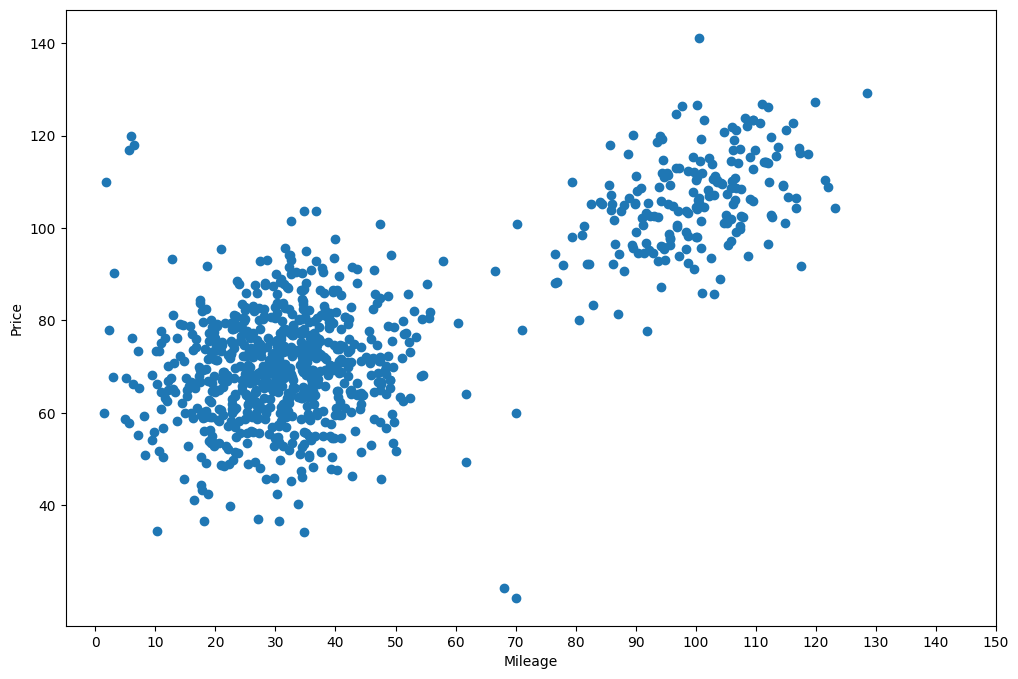

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### EllipticEnvelope:
 https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

In [40]:
from sklearn.covariance import EllipticEnvelope

cov_model = EllipticEnvelope(random_state=0, contamination=0.05)
cov_model.fit(df)

EllipticEnvelope(contamination=0.05, random_state=0)

In [41]:
ee_pred = cov_model.predict(df)
ee_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [42]:
cov_model.predict([[120,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


array([-1])

In [43]:
cov_model.predict([[70,60]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


array([1])

In [44]:
cov_model.predict([[70,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


array([1])

In [45]:
df['is_outlier_ee']=ee_pred

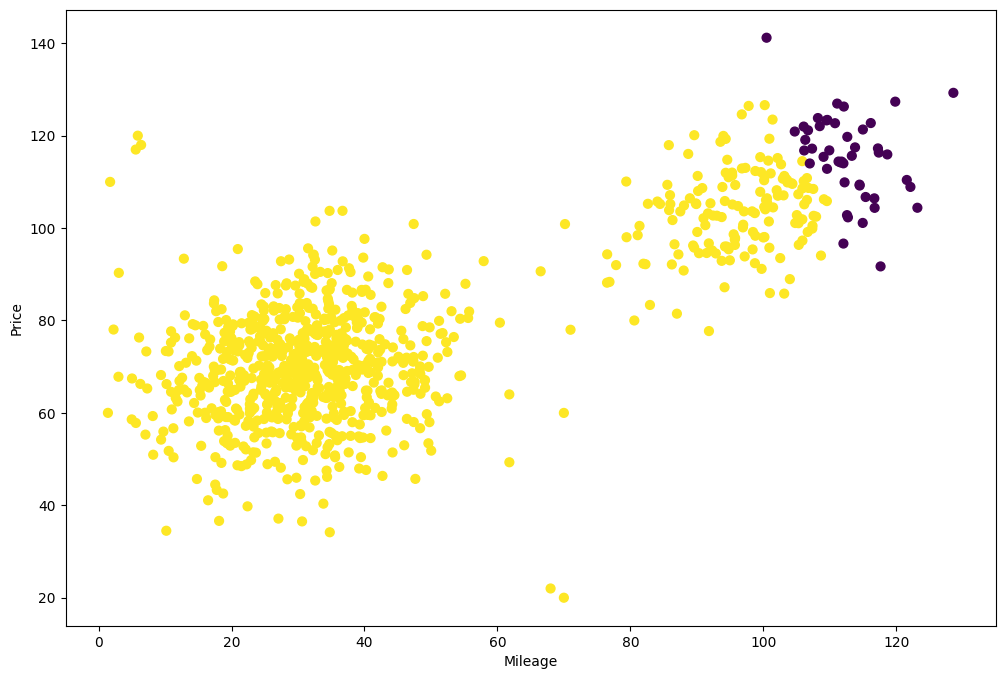

In [46]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [47]:
df_1 = df[df['Mileage']<70]
df_2 = df[df['Mileage']>=70]

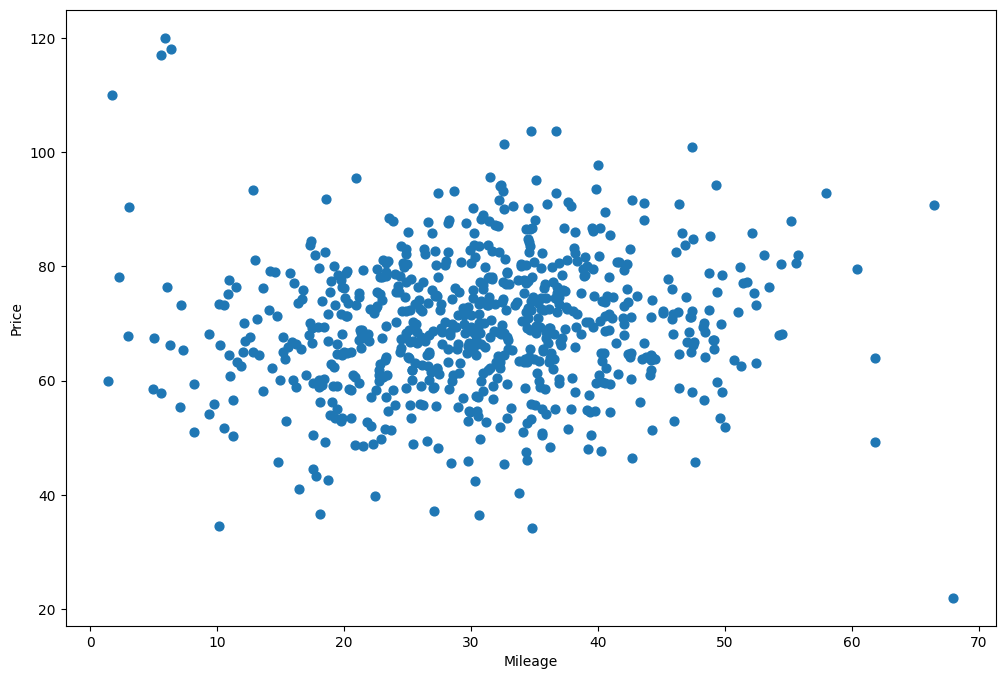

In [48]:
plt.scatter(df_1.Mileage, df_1.Price, s=40)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

<ipython-input-52-b038d277b879>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['is_outlier_ee']=ee_pred_1


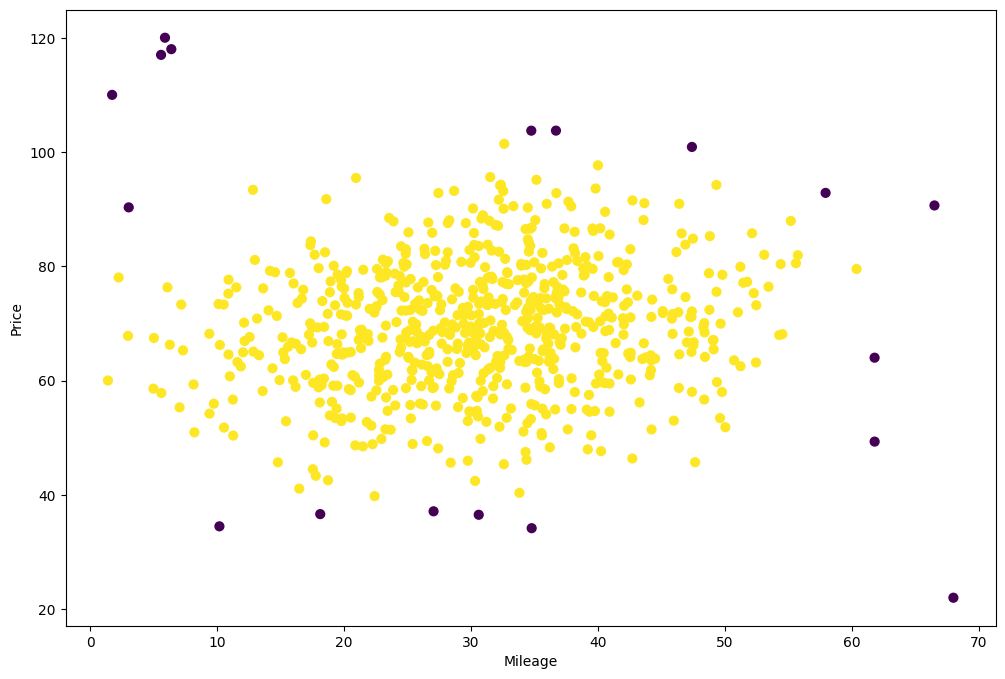

In [52]:
from sklearn.covariance import EllipticEnvelope

cov_model = EllipticEnvelope(random_state=0, contamination=0.025)
cov_model.fit(df_1)

ee_pred_1 = cov_model.predict(df_1)
df_1['is_outlier_ee']=ee_pred_1


plt.scatter(df_1.Mileage, df_1.Price, s=40, c=df_1['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


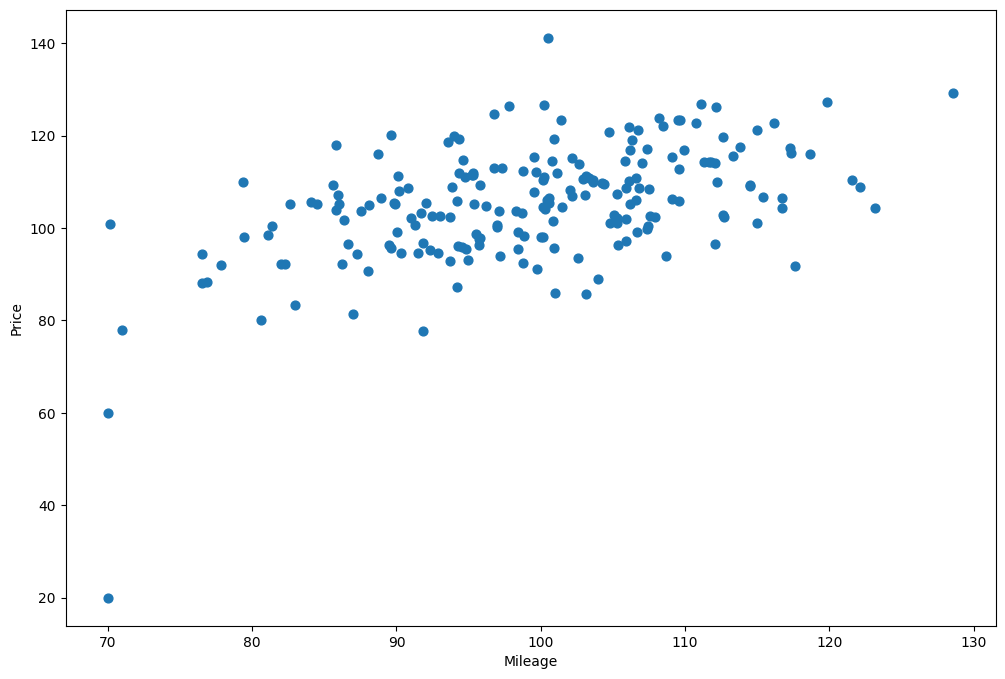

In [49]:
plt.scatter(df_2.Mileage, df_2.Price, s=40)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

- **Activity:** Peform EE on second and cluster, merge the results and plot

### IsolationForest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [ ]:
from sklearn.ensemble import IsolationForest

# using same data that we used in Elliptical Envelope -----> X
if_model = IsolationForest(random_state=0, contamination = 0.05)
if_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=0)

In [ ]:
if_pred = if_model.predict(df)
df['is_outlier_if'] = if_pred

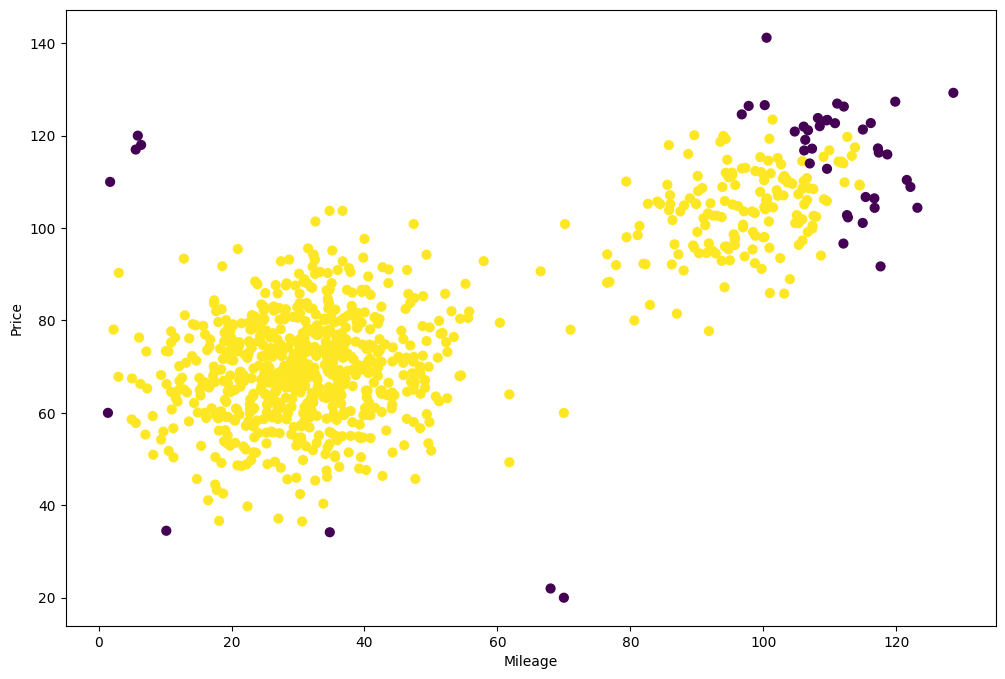

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()